In [2]:
import pandas as pd
import numpy as np

In [8]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import norm

In [5]:
# ! pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.4/251.4 kB 9.4 kB/s eta 0:00:00a 0:00:02


In [10]:
data = pd.read_excel("./data/imoex_rtf_rate/RTSI.xlsx")[::-1]
data.head()

,Date,RTSI
993,2020-01-03,1564.18
992,2020-01-06,1568.35
991,2020-01-08,1589.08
990,2020-01-09,1601.74
989,2020-01-10,1614.69


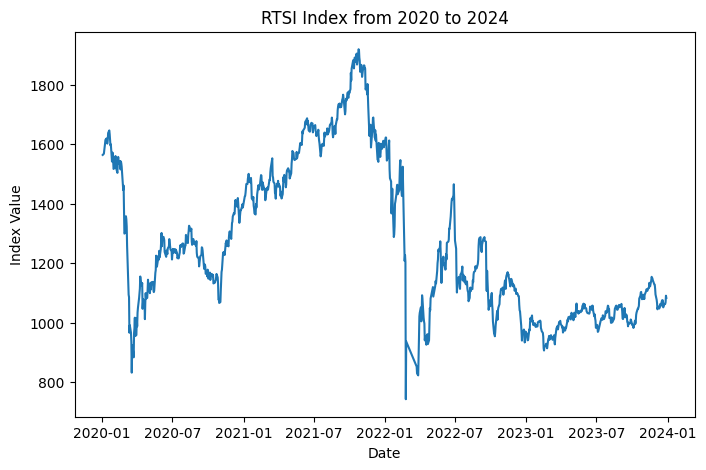

In [25]:
# data_rtsi = data['RTSI']  # Предположим, что колонка с индексом RTSI называется 'RTSI'

# Визуализация данных
plt.figure(figsize=(8, 5))
plt.plot(data['Date'], data['RTSI'])
plt.title('RTSI Index from 2020 to 2024')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.show()

In [26]:
# Описательная статистика
print(data.describe())

                                Date         RTSI
count                            994   994.000000
mean   2022-01-02 22:05:33.199195136  1269.338370
min              2020-01-03 00:00:00   742.910000
25%              2020-12-29 06:00:00  1050.675000
50%              2021-12-20 12:00:00  1205.195000
75%              2023-01-09 18:00:00  1474.707500
max              2023-12-29 00:00:00  1919.580000
std                              NaN   257.062105


In [27]:
result = adfuller(data['RTSI'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.462722
p-value: 0.124810


Вывод: сам ряд не стационарен. Дифференцируем.

In [32]:
data['RTSI_diff']= data['RTSI'].diff()

In [33]:
result = adfuller(data['RTSI_diff'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -13.507575
p-value: 0.000000


Вывод: теперь стационарен

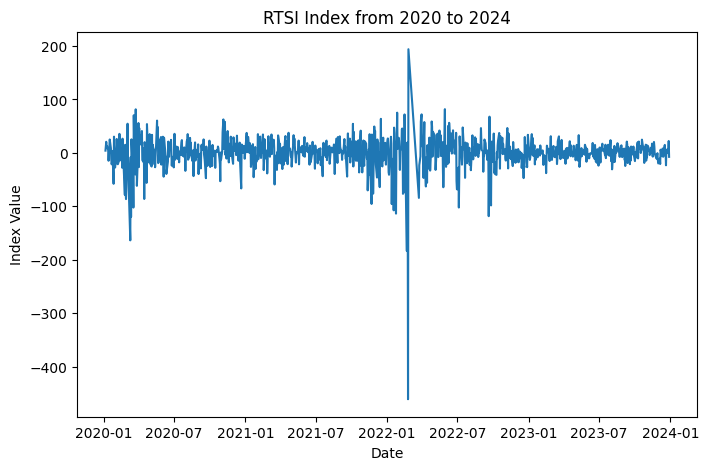

In [35]:
# Визуализация данных
plt.figure(figsize=(8, 5))
plt.plot(data['Date'], data['RTSI_diff'])
plt.title('RTSI Index from 2020 to 2024')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.show()

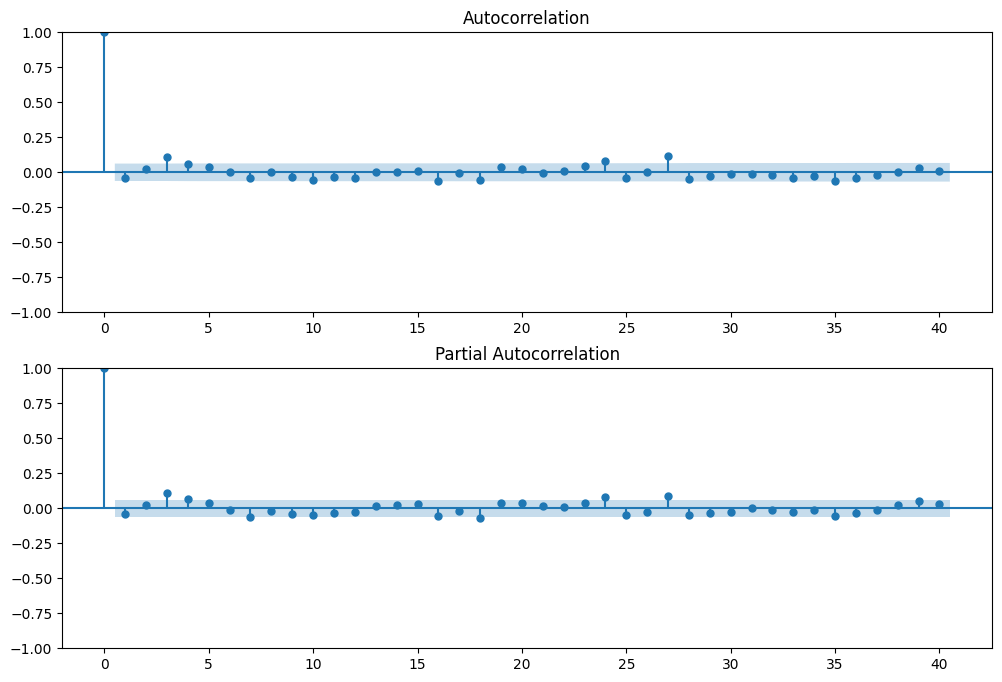

In [37]:
# ACF и PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(data['RTSI_diff'].dropna(), lags=40, ax=ax[0])
plot_pacf(data['RTSI_diff'].dropna(), lags=40, ax=ax[1])
plt.show()


In [41]:
# Выбор параметров ARIMA
p = 1  # Количество лагов авторегрессии, основанное на PACF
d = 1  # Интегрирование, чтобы сделать данные стационарными
q = 1  # Количество лагов скользящего среднего, основанное на ACF

# Обучение модели ARIMA
model = ARIMA(data['RTSI'], order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                   RTSI   No. Observations:                  994
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4803.356
Date:                Wed, 12 Jun 2024   AIC                           9612.712
Time:                        23:16:08   BIC                           9627.414
Sample:                             0   HQIC                          9618.302
                                - 994                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7910      0.237      3.342      0.001       0.327       1.255
ma.L1         -0.7704      0.243     -3.171      0.002      -1.247      -0.294
sigma2       931.7075      9.258    100.641      0.0